# Afleveringsopgave 3

In [47]:
import numpy as np

In [48]:
import matplotlib.pyplot as plt

##### a)

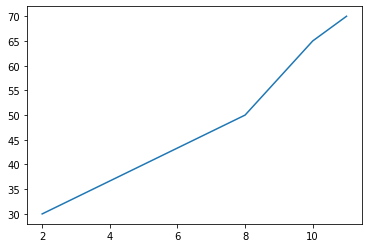

In [49]:
tid = [2.0, 5.0, 8.0, 10.0, 11.0]
temperatur = [30.0, 40.0, 50.0, 65.0, 70.0]

fig, ax = plt.subplots()
ax.plot(tid, temperatur)
plt.show()
print("\n")

##### b)

Vi har en andengradsligning:

p(x) = a + b * x + c * x**2 

Med den kan opstille et ligningssytem, hvor a, b og c er de eneste ubekendte:

50.0 = a + 8b + 64c 

65.0 = a + 10b + 100c

70.0 = a + 11b + 121



In [51]:
A = np.array([[1.0, 8.0, 64.0],
              [1.0, 10.0, 100.0],
              [1.0, 11.0, 121.0]])

B = np.array([50.0, 65.0, 70.0])[:, np.newaxis]

C = np.hstack([A,B])
C


array([[  1.,   8.,  64.,  50.],
       [  1.,  10., 100.,  65.],
       [  1.,  11., 121.,  70.]])

In [52]:
C[[1,2],:] -= C[0,:]        # Først trækker vi række 0 fra 1 og 2 for at få 0 i søjle 0
C[2,:] -= 3/2 * C[1,:]      # Nu trækker vi en skaleret søjle 1 fra 2, for at få 0 i søjle 1
C[1,:] *= 1/2               # Til sidst bruger vi skalarer til at etablere pivotelementerne
C[2,:] *= 1/3
C

array([[ 1.        ,  8.        , 64.        , 50.        ],
       [ 0.        ,  1.        , 18.        ,  7.5       ],
       [ 0.        ,  0.        ,  1.        , -0.83333333]])

In [53]:
C[1,:] -= 18 * C[2,:]               # Nu reducerer vi koefficientmatricen til en indentitsmatrice for at finde løsningen
C[0,:] -= 64 * C[2,:] + 8 * C[1,:]
C

array([[  1.        ,   0.        ,   0.        , -76.66666667],
       [  0.        ,   1.        ,   0.        ,  22.5       ],
       [  0.        ,   0.        ,   1.        ,  -0.83333333]])

In [61]:
a, b, c = C[:,3]
a, b, c #Løsningerne på ligningssystemet 

(-76.66666666666667, 22.5, -0.8333333333333333)

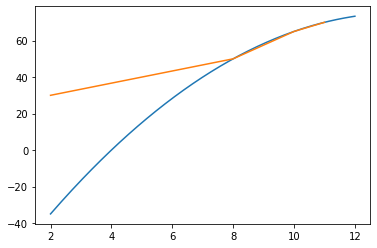

In [62]:
x = np.linspace(2, 12, 200)

y = a + b * x + c * x**2   

fig, ax = plt.subplots() # Tegning 
ax.plot(x, y)
ax.plot(tid, temperatur)
plt.show()

Her kan vi se, at polynomiet passer rimelig godt på vores data i intervallet mellem vores tre punkter. Bevæger vi os ud herfra, afviger funktionen dog hurtigt fra vores data.

c)